In [1]:
from data_pipeline import *
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from clustering import *
import seaborn as sns
import scipy.stats as stats

In [2]:
root_gene = None
minimum_evidence = 'weak'
max_depth = np.inf
r_expr, gene_symbols, sample_names = load_data()

### GAN data ###
synthetic_name = 'MTB_overexpr_n{}_test30k'.format(len(gene_symbols))
gan_expr, gan_gs = load_synthetic(synthetic_name)
assert (np.array(gene_symbols) == np.array(gan_gs)).all()


Found 4026 genes in datafile


In [3]:
r_expr.shape

(698, 4026)

# Clip outliers (optional)

In [4]:
#For gan expression
# Find minimum and maximum expression values
#r_min = np.min(r_expr)
#r_max = np.max(r_expr)

# Clip outliers
#s_expr[s_expr < r_min] = r_min
#s_expr[s_expr > r_max] = r_max

####################################################

#For real expression
# Find minimum and maximum expression values
#s_min = np.min(s_expr)
#s_max = np.max(s_expr)

# Clip outliers
#r_expr[r_expr < s_min] = s_min
#r_expr[r_expr > s_max] = s_max

# Plot distribution for individual genes

Overlap score : 0.713989990512726


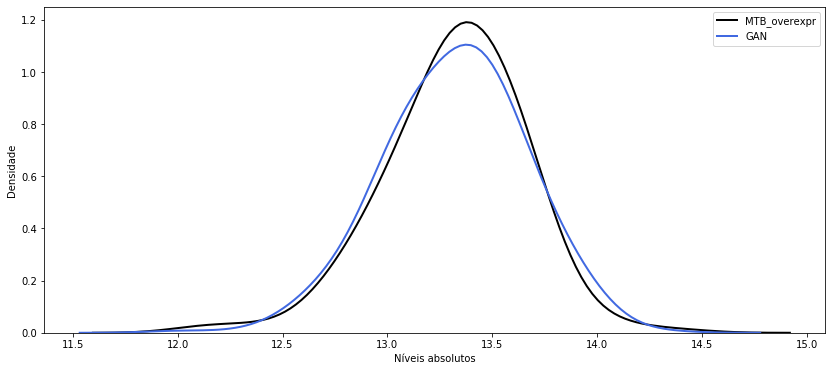

In [23]:
plt.figure(figsize=(14, 6))
idx = 1
plot_distribution(r_expr[:, idx], color='black', label='MTB_overexpr', xlabel='Níveis absolutos', ylabel='Densidade');
plot_distribution(gan_expr[:, idx], color='royalblue', label='GAN', xlabel='Níveis absolutos', ylabel='Densidade');
overlap_score(r_expr[:, idx], gan_expr[:, idx])

# Intensity histograms

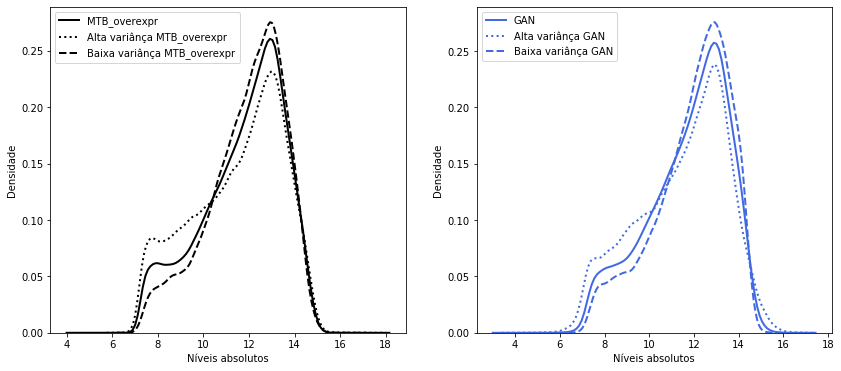

In [24]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_intensities(r_expr, dataset_name='MTB_overexpr', color='black')
plt.subplot(122)
plot_intensities(gan_expr, dataset_name='GAN', color='royalblue');


Overlap score : 0.651781698583307


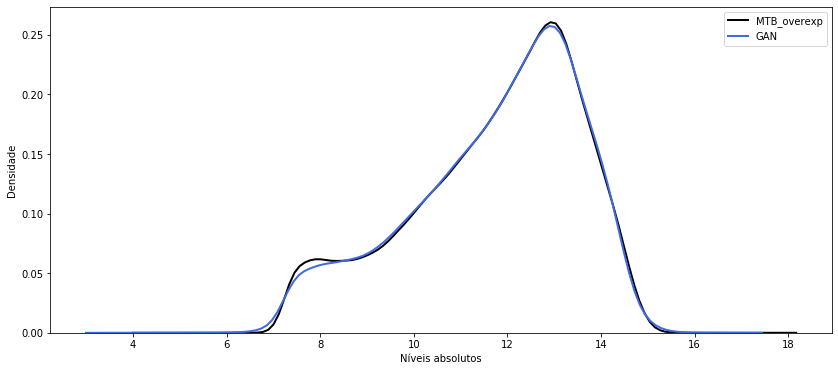

In [25]:
plt.figure(figsize=(14, 6))
ax = plot_intensities(r_expr, dataset_name='MTB_overexp', color='black', plot_quantiles=False)
ax = plot_intensities(gan_expr, dataset_name='GAN', color='royalblue', plot_quantiles=False, ax=ax);
overlap_score(r_expr, gan_expr)

# Gene ranges histograms

Overlap score : 0.9121028788934252


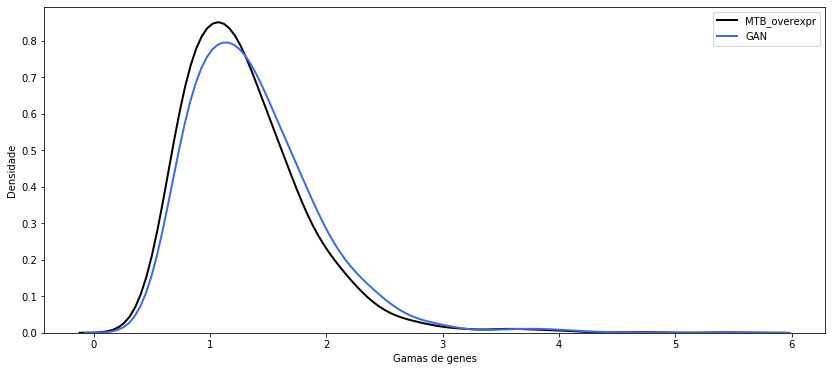

In [14]:
plt.figure(figsize=(14, 6))
ax1, diff1 = plot_gene_ranges(r_expr, dataset_name='MTB_overexpr', color='black')
ax2, diff2 = plot_gene_ranges(gan_expr, dataset_name='GAN', color='royalblue', ax=ax1);
overlap_score(diff1, diff2)

# Correlations

In [15]:
real_corr = correlations_list(r_expr, r_expr, corr_fun=pearson_correlation)
gan_corr = correlations_list(gan_expr, gan_expr, corr_fun=pearson_correlation)
back_corr = correlations_list(gan_expr, r_expr, corr_fun=pearson_correlation)

Text(0, 0.5, 'Densidade')

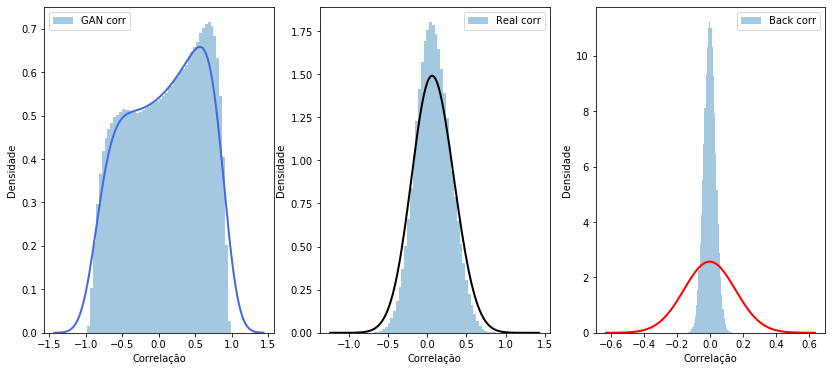

In [16]:
plt.figure(figsize=(14, 6))
plt.subplot(131)
plot_gan_corr = sns.distplot(gan_corr, kde_kws={'color': 'royalblue', 'linewidth': 2, 'bw': .15}, label='GAN corr', ax=None)
plt.legend()
plt.xlabel('Correlação')
plt.ylabel('Densidade')

plt.subplot(132)
plot_real_corr = sns.distplot(real_corr, kde_kws={'color': 'black', 'linewidth': 2, 'bw': .15}, label='Real corr', ax=None)
plt.legend()
plt.xlabel('Correlação')
plt.ylabel('Densidade')

plt.subplot(133)
plot_back_corr = sns.distplot(back_corr, kde_kws={'color': 'red', 'linewidth': 2, 'bw': .15}, label='Back corr', ax=None)
plt.legend()
plt.xlabel('Correlação')
plt.ylabel('Densidade')

Text(0, 0.5, 'Densidade')

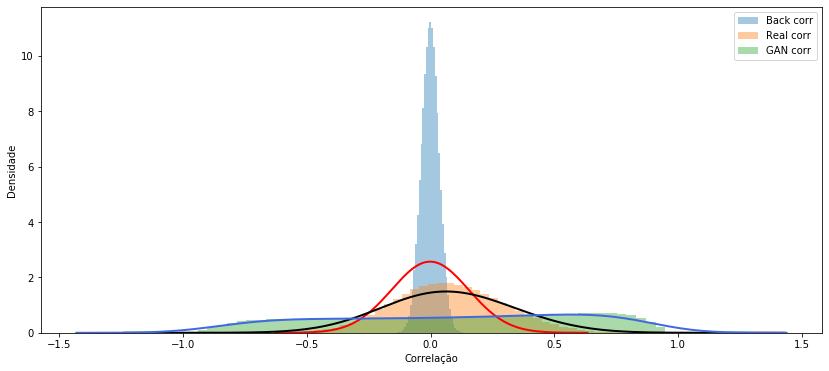

In [17]:
plt.figure(figsize=(14,6))
ax1=sns.distplot(back_corr, kde_kws={'color': 'red', 'linewidth': 2, 'bw': .15}, label='Back corr', ax=None)
ax2=sns.distplot(real_corr, kde_kws={'color': 'black', 'linewidth': 2, 'bw': .15}, label='Real corr', ax=ax1)
ax3=sns.distplot(gan_corr, kde_kws={'color': 'royalblue', 'linewidth': 2, 'bw': .15}, label='GAN corr', ax=ax2)
plt.legend()
plt.xlabel('Correlação')
plt.ylabel('Densidade')

Overlap score : 0.3470629466557691


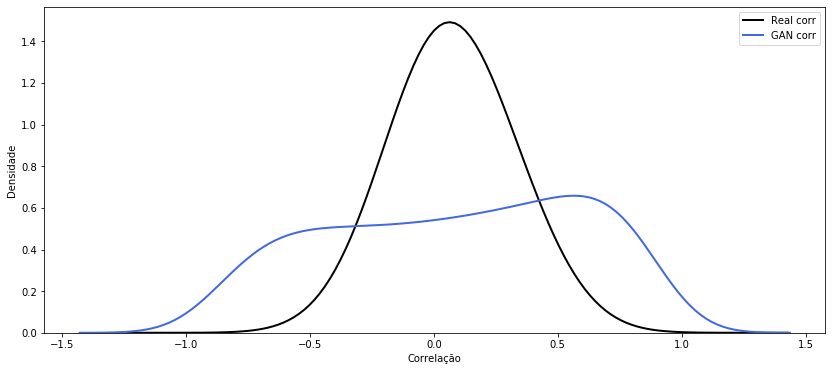

In [19]:
plt.figure(figsize=(14,6))
ax1=sns.distplot(real_corr, kde_kws={'color': 'black', 'linewidth': 2, 'bw': .15}, label='Real corr', ax=None, hist=False)
ax2=sns.distplot(gan_corr, kde_kws={'color': 'royalblue', 'linewidth': 2, 'bw': .15}, label='GAN corr', ax=ax1, hist=False)
plt.legend()
plt.xlabel('Correlação')
plt.ylabel('Densidade')
overlap_score(real_corr, gan_corr)

# Silhouette coefficient

In [20]:
#Dendrograms

#Real data
real_clust = hierarchical_clustering(r_expr, corr_fun=pearson_correlation)
real_sil = compute_silhouette(r_expr, real_clust)

#GAN data
gan_clust = hierarchical_clustering(gan_expr, corr_fun=pearson_correlation)
gan_sil = compute_silhouette(gan_expr, gan_clust)

Text(0, 0.5, 'Density')

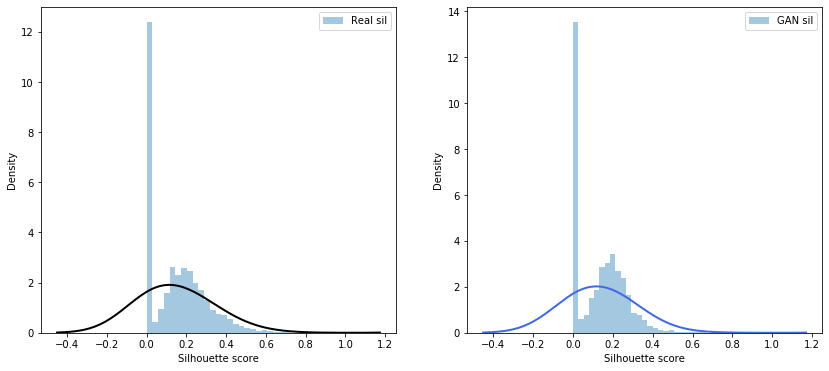

In [21]:
plt.figure(figsize=(14,6))

plt.subplot(121)
ax1=sns.distplot(real_sil, kde_kws={'color': 'black', 'linewidth': 2, 'bw': .15}, label='Real sil', ax=None)
plt.legend()
plt.xlabel('Silhouette score')
plt.ylabel('Density')

plt.subplot(122)
ax1=sns.distplot(gan_sil, kde_kws={'color': 'royalblue', 'linewidth': 2, 'bw': .15}, label='GAN sil', ax=None)
plt.legend()
plt.xlabel('Silhouette score')
plt.ylabel('Density')

Overlap score : 0.8599868591278005


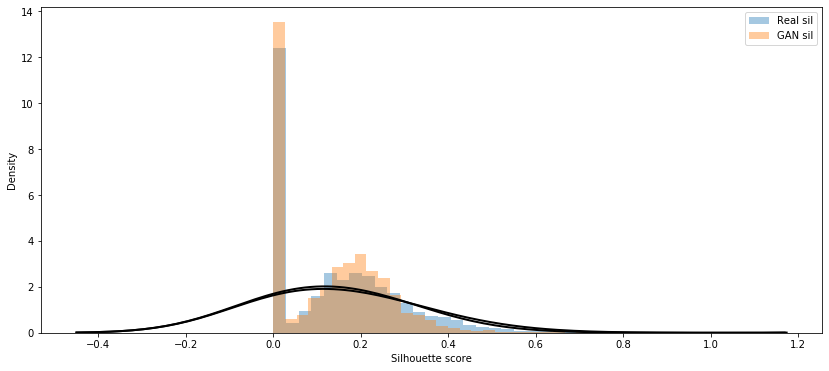

In [22]:
plt.figure(figsize=(14,6))
ax1=sns.distplot(real_sil, kde_kws={'color': 'black', 'linewidth': 2, 'bw': .15}, label='Real sil', ax=None)
sns.distplot(gan_sil, kde_kws={'color': 'black', 'linewidth': 2, 'bw': .15}, label='GAN sil', ax=ax1)
plt.legend()
plt.xlabel('Silhouette score')
plt.ylabel('Density')
overlap_score(real_sil, gan_sil)